
# Lecture 7: Classification with Generative Algorithms
Adapted from Applied Machine Learning Lecture Notes of Volodymyr Kuleshov, Cornel Tech

__Instructor Tan Bui__

# Part 1: Generative Models

In this lecture, we are going to look at generative algorithms and their applications to classification.

We will start by defining the concept of a generative *model*.

# Review: Components of A Supervised Machine Learning Problem

At a high level, a supervised machine learning problem has the following structure:

$$ \underbrace{\text{Training Dataset}}_\text{Attributes + Features} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

# Review: Probabilistic Models

A (parametric) probabilistic model with parameters $\boldsymbol\theta$ is a probability distribution
$$P_{\boldsymbol\theta}(\mathbf x,y) : \mathcal{X} \times \mathcal{Y} \to [0,1].$$
This model can approximate the data distribution $\mathbb{P}(\mathbf x,y)$.

If we know $P_{\boldsymbol\theta}(\mathbf x,y)$, we can compute predictions using the formula 
$$P_{\boldsymbol\theta}(y|\mathbf x) = \frac{P_{\boldsymbol\theta}(\mathbf x,y)}{P_{\boldsymbol\theta}(\mathbf x)} = \frac{P_{\boldsymbol\theta}(\mathbf x,y)}{\sum_{y \in \mathcal{Y}} P_{\boldsymbol\theta}(\mathbf x, y)}.$$

Note that, for continuous random variable, we have $$P_{\boldsymbol\theta}(\mathbf x) = \int P_{\boldsymbol\theta}(\mathbf x, y)\,dy$$ instead of the summation. 

# Review: Maximum (joint) Likelihood Learning

In order to fit probabilistic models, we use the following objective:
$$ \max_{\boldsymbol\theta} \mathbb{E}_{\mathbf x, y \sim \mathbb{P}_\text{data}} \log P_{\boldsymbol\theta}(\mathbf x, y). $$
This seeks to find a model that assigns high probability to the training data.

# Review: Maximum conditional Likelihood Learning

Alternatively, we may define a model of the conditional probability distribution:
$$P_{\boldsymbol\theta}(y|\mathbf x) : \mathcal{X} \times \mathcal{Y} \to [0,1].$$

These are trained using conditional maximum likelihood:
$$ \max_{\boldsymbol\theta} \mathbb{E}_{\mathbf x, y \sim \mathbb{P}_\text{data}} \log P_{\boldsymbol\theta}(y|\mathbf x). $$
This seeks to find a model that assigns high conditional probability to the target $y$ for each $\mathbf x$.

Logistic regression is an example of this approach.

# Discriminative vs. Generative Models

These two types of models are also known as *generative* and *discriminative*.
\begin{align*}
\underbrace{P_{\boldsymbol\theta}(\mathbf x,y) : \mathcal{X} \times \mathcal{Y} \to [0,1]}_\text{generative model} & \;\; & \underbrace{P_{\boldsymbol\theta}(y|\mathbf x) : \mathcal{X} \times \mathcal{Y} \to [0,1]}_\text{discriminative model}
\end{align*}

* The models parametrize different kinds of probabilities
* They involve different training objectives and make different predictions
* Their uses are different (e.g., prediction, generation); more later!

# Classification Dataset: Iris Flowers

To demonstrate the two approaches, we are going to use the Iris flower dataset. 

It's a classical dataset originally published by [R. A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in 1936. Nowadays, it's widely used for demonstrating machine learning algorithms.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris(as_frame=True)

# print part of the dataset
iris_X, iris_y = iris.data, iris.target
pd.concat([iris_X, iris_y], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


If we only consider the first two feature columns, we can visualize the dataset in 2D.

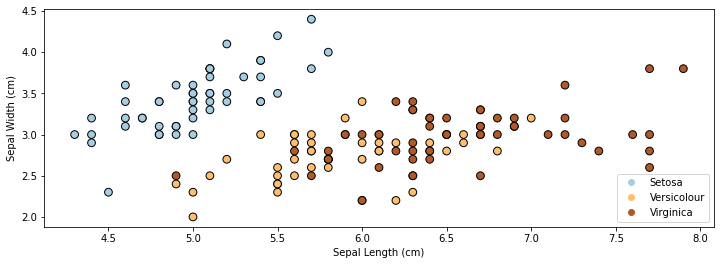

In [2]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# create 2d version of dataset
X = iris_X.to_numpy()[:,:2]
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Plot also the training points
p1 = plt.scatter(X[:, 0], X[:, 1], c=iris_y, edgecolor='k', s=60, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='lower right')

# Example: Discriminative Model

An example of a discriminative model is logistic or softmax regression.
* Discriminative models directly partition the feature space into regions associated with each class and separated by a decision boundary.

* Given features $x$, discriminative models directly map to predicted classes (e.g., via the function $\sigma(\theta^\top x)$ for logistic regression).

Text(0, 0.5, 'Sepal width')

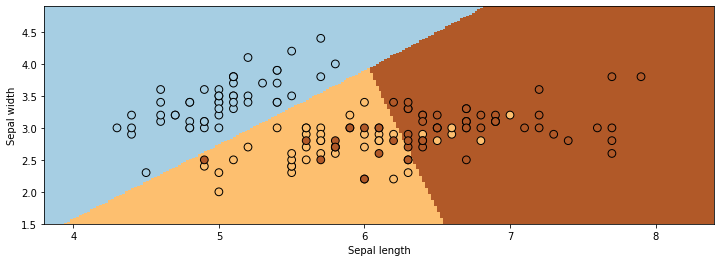

In [3]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, multi_class='multinomial')

# Create an instance of Softmax and fit the data.
logreg.fit(X, iris_y)
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=iris_y, edgecolors='k', s=60, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Example: Generative Model

Generative modeling can be seen as taking a different approach:
1. In the Iris example, we first build a model of how each type of flower looks, i.e. we can learn the distribution
$$ P(\mathbf x | y=k) \; \text{for each class $k$}.$$
It defines a model of how each flower is *generated*, hence the name.

2. Given a new flower datapoint $\mathbf x'$, we can match it against each flower model $P(\mathbf x | y)$ and find the type of flower $y$ that looks most similar to it. Mathematically, this corresponds to:
\begin{align*}
\arg \max_y \log P(y | \mathbf x) & = \arg \max_y \log \frac{P(\mathbf x | y) P(y)}{P(\mathbf x)} \\
& = \arg \max_y \log P(\mathbf x | y) P(y),
\end{align*}
where we have applied Bayes' rule in the first equality.

# Generative vs. Discriminative Approaches

How do we know which approach is better?
* If we only care about prediction, we don't need a model of $P(\mathbf x)$. We can solve precisely the problem we care about.
    * Discriminative models will often be more accurate.

* If we care about other tasks (generation, dealing with missing values, etc.) or if we know the true model is generative, we want to use the generative approach.

More on this later!


# Part 2: Gaussian Discriminant Analysis

We are now going to continue our discussion of classification.
* We will see a new classification algorithm, Gaussian Discriminant Analysis.
* This will be our first example of generative machine learning model.

# Review: Classification

Consider a training dataset $\mathcal{D} = \{(\mathbf x^{(1)}, y^{(1)}), (\mathbf x^{(2)}, y^{(2)}), \ldots, (\mathbf x^{(n)}, y^{(n)})\}$.

We distinguish between two types of supervised learning problems depnding on the targets $y^{(i)}$. 

1. __Regression__: The target variable $y \in \mathcal{Y}$ is continuous:  $\mathcal{Y} \subseteq \mathbb{R}$.
2. __Classification__: The target variable $y$ is discrete and takes on one of $K$ possible values:  $\mathcal{Y} = \{y_1, y_2, \ldots y_K\}$. Each discrete value corresponds to a *class* that we want to predict.

# Review: Generative Models

There are two types of probabilistic models: *generative* and *discriminative*.
\begin{align*}
\underbrace{P_{\boldsymbol\theta}(\mathbf x,y) : \mathcal{X} \times \mathcal{Y} \to [0,1]}_\text{generative model} & \;\; & \underbrace{P_{\boldsymbol\theta}(y|\mathbf x) : \mathcal{X} \times \mathcal{Y} \to [0,1]}_\text{discriminative model}
\end{align*}

* They involve different training objectives and make different predictions
* Their uses are different (e.g., prediction, generation); more later!

# A brief introduction to Mixtures of Gaussians

A mixture of $K$ Gaussians is a distribution $P(\mathbf x)$ of the form:

$$\phi_1 \mathcal{N}(\mathbf x; \boldsymbol\mu_1, \boldsymbol\Sigma_1) + \phi_2 \mathcal{N}(\mathbf x; \boldsymbol\mu_2, \boldsymbol\Sigma_2) + \ldots + \phi_K \mathcal{N}(\mathbf x; \boldsymbol\mu_K, \boldsymbol\Sigma_K).$$

* Each $\mathcal{N}(\mathbf x; \boldsymbol\mu_k, \boldsymbol\Sigma_k)$ is a (multivariate) Gaussian distribution with mean $\boldsymbol\mu_k$ and covariance $\boldsymbol\Sigma_k$.
* The $\phi_k$ are weights, and the above sum is a weighted average of the $K$ Gaussians.

We can easily visualize this in 1D:

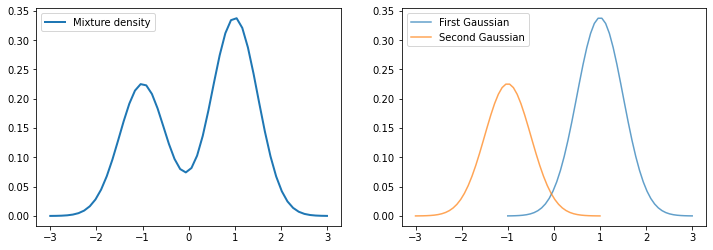

In [4]:
def N(x,mu,sigma):
    return np.exp(-.5*(x-mu)**2/sigma**2)/np.sqrt(2*np.pi*sigma)

def mixture(x):
    return 0.6*N(x,mu=1,sigma=0.5) + 0.4*N(x,mu=-1,sigma=0.5)

xs, xs1, xs2 = np.linspace(-3,3), np.linspace(-1,3), np.linspace(-3,1)
plt.subplot('121')
plt.plot(xs, mixture(xs), label='Mixture density', linewidth=2)
plt.legend()

plt.subplot('122')
plt.plot(xs1, 0.6*N(xs1,mu=1,sigma=0.5), label='First Gaussian', alpha=0.7)
plt.plot(xs2, 0.4*N(xs2,mu=-1,sigma=0.5), label='Second Gaussian', alpha=0.7)
plt.legend()

# Gaussian Discriminant Model using mixture of Gaussians

We may use mixture of Gaussians to define a model $P_\theta$. This will be the basis of an algorthim called Gaussian Discriminant Analysis.
* The distribution over classes is [Categorical](https://en.wikipedia.org/wiki/Categorical_distribution), denoted $\text{Categorical}(\phi_1, \phi_2, ..., \phi_K)$. We thus define $P_{\boldsymbol\theta}(y=k) = \phi_k$.
* The conditional probability $P_\theta(\mathbf x\mid y=k)$ of the data under class $k$ is a [multivariate Gaussian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) $\mathcal{N}(\mathbf x; \boldsymbol\mu_k, \boldsymbol\Sigma_k)$ with mean and covariance $\boldsymbol\mu_k, \boldsymbol\Sigma_k$.

Thus, by the law of total probability (see the probability note), $P_{\boldsymbol\theta}(\mathbf x)$ is a mixture of $K$ Gaussians:
$$P_{\boldsymbol\theta}(\mathbf x) = \sum_{k=1}^K P_{\boldsymbol\theta}(y=k) P_{\boldsymbol\theta}(\mathbf x|y=k) = \sum_{k=1}^K \phi_k \mathcal{N}(\mathbf x; \boldsymbol\mu_k, \boldsymbol\Sigma_k)$$

Intuitively, this model defines a story for how the data was generated. To obtain a data point,
* **STEP 1**: we sample a class $y \sim \text{Categorical}(\phi_1, \phi_2, ..., \phi_K)$ with class proportions given by the $\phi_k$.
* **STEP 2**: we sample an $\mathbf x$ from a Gaussian distribution $\mathcal{N}(\boldsymbol\mu_k, \boldsymbol\Sigma_k)$ specific to that class.

Such a story can be constructed for most generative algorithms and helps understand them.

# Classification Dataset: Iris Flowers

To demonstrate this approach, we are going to use the Iris flower dataset. 

It's a classical dataset originally published by [R. A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in 1936. Nowadays, it's widely used for demonstrating machine learning algorithms.

In [5]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris(as_frame=True)

# print part of the dataset
iris_X, iris_y = iris.data, iris.target
pd.concat([iris_X, iris_y], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


If we only consider the first two feature columns, we can visualize the dataset in 2D.

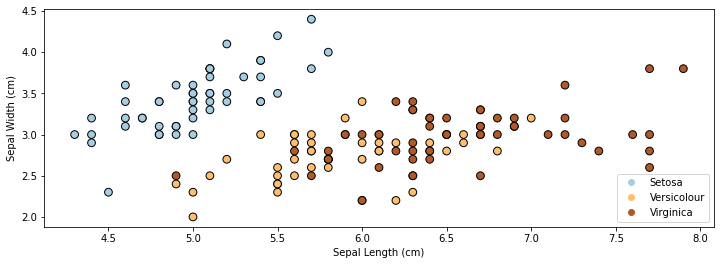

In [6]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# create 2d version of dataset
X = iris_X.to_numpy()[:,:2]
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Plot also the training points
p1 = plt.scatter(X[:, 0], X[:, 1], c=iris_y, edgecolor='k', s=60, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='lower right')

# Example: Iris Flower Classification

Let's see how this approach can be used in practice on the Iris dataset.
* We will "guess" a good set of parameters for a Gaussian Discriminant model
* We will sample from the model and compare to the true data

In [16]:
s = 100 # number of samples
K = 3 # number of classes
d = 2 # number of features

# guess the parameters
phi = 1./K * np.ones(K,)
mus = np.array(
[[5.0, 3.5],
 [6.0, 2.5],
 [6.5, 3.0]]
)
Sigmas = 0.05*np.tile(np.reshape(np.eye(2),(1,2,2)),(K,1,1))
                    
# STEP 1: we sample flower class based on phi
ys = np.random.multinomial(n=1, pvals=phi, size=(s,)).argmax(axis=1)
xs = np.zeros([s,d])

# STEP 2: sample flowers from each class
for k in range(K):
    nk = (ys==k).sum()
    xs[ys==k,:] = np.random.multivariate_normal(mus[k], Sigmas[k], size=(nk,))

print(xs[:10])

[[5.2165882  3.21585548]
 [6.33723498 2.37079596]
 [4.70584828 3.66759626]
 [6.01757646 2.87483419]
 [5.63943149 2.31868567]
 [6.12322516 2.75806014]
 [6.3354125  2.81309308]
 [6.05775836 2.5764983 ]
 [6.02840033 2.80197148]
 [6.11929254 2.43503439]]


Text(0, 0.5, 'Sepal width')

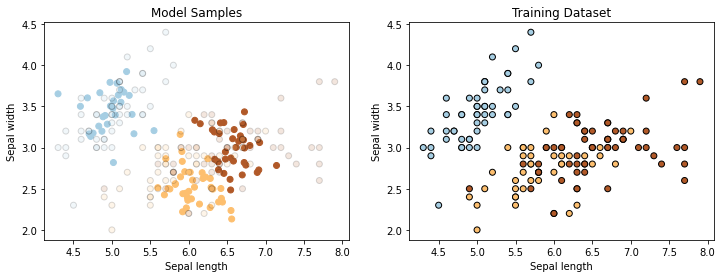

In [8]:
plt.subplot('121')
plt.title('Model Samples')
plt.scatter(xs[:,0], xs[:,1], c=ys, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=iris_y, edgecolors='k', cmap=plt.cm.Paired, alpha=0.15)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Plot also the training points
plt.subplot('122')
plt.title('Training Dataset')
plt.scatter(X[:, 0], X[:, 1], c=iris_y, edgecolors='k', cmap=plt.cm.Paired, alpha=1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

* Our Gaussian Discirminant model generates data that looks not unlike the real data.
* Let's now see how we can learn parameters from data and use the model to make predictions.


# Part 3: Gaussian Discriminant Analysis: Learning

In the previous example, we show the two-step process to generate new flowers provided that we know the parameters , $\{\phi_i\}_{i=1}^K, \{\boldsymbol\mu_i\}_{i=1}^K, \{\boldsymbol\Sigma_i\}_{i=1}^K$.

We continue our discussion of Gaussian Discriminant analysis, and look at:
* How to learn these parameters of the mixture model
* How to use the model to make predictions

# Review: Gaussian Discriminant Model

We may define a model $P_\theta$ as follows. This will be the basis of an algorthim called Gaussian Discriminant Analysis.
* The distribution over classes is [Categorical](https://en.wikipedia.org/wiki/Categorical_distribution), denoted $\text{Categorical}(\phi_1, \phi_2, ..., \phi_K)$. Thus, $P_{\boldsymbol\theta}(y=k) = \phi_k$.
* The conditional probability $P(\mathbf x\mid y=k)$ of the data under class $k$ is a [multivariate Gaussian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) $\mathcal{N}(\mathbf x; \boldsymbol\mu_k, \boldsymbol\Sigma_k)$ with mean and covariance $\boldsymbol\mu_k, \boldsymbol\Sigma_k$.

Thus, $P_{\boldsymbol\theta}(\mathbf x)$ is a mixture of $K$ Gaussians:
$$P_{\boldsymbol\theta}(\mathbf x) = \sum_{k=1}^K P_{\boldsymbol\theta}(y=k) P_{\boldsymbol\theta}(\mathbf x|y=k) = \sum_{k=1}^K \phi_k \mathcal{N}(\mathbf x; \boldsymbol\mu_k, \boldsymbol\Sigma_k).$$

The **joint** distribution of $\mathbf x$ and $y = i$ is thus
$$
P_{\boldsymbol\theta}(\mathbf x,y = i) =  P_{\boldsymbol\theta}(\mathbf x|y=i) P_{\boldsymbol\theta}(y=i) = \phi_i \mathcal{N}(\mathbf x; \boldsymbol\mu_i, \boldsymbol\Sigma_i),
$$
and this is exactly what we need for the joint likelihood next.

# Review: Maximum Likelihood Learning

In order to fit probabilistic models, we use maximum joint likelihood that we have learned:
$$ \max_{\boldsymbol\theta} \mathbb{E}_{\mathbf x, y \sim \mathbb{P}_\text{data}} \log P_{\boldsymbol\theta}(\mathbf x, y). $$
This seeks to find a model that assigns high probability to the training data.

Let's use maximum likelihood to fit the Gaussian Discriminant model. In this case, the model parameters $\boldsymbol\theta$ are the union of the parameters of each sub-model:
$$\boldsymbol\theta = (\boldsymbol\mu_1, \boldsymbol\Sigma_1, \phi_1, \ldots, \boldsymbol\mu_K, \boldsymbol\Sigma_K, \phi_K).$$


As discuss above, the components of the joint likelihood $P_{\boldsymbol\theta}(\mathbf x,y=i)$ are as follows:

\begin{align*}
P_{\boldsymbol\theta}(y = i) & =\frac{\phi_i}{\sum_{k=1}^K\phi_k} \\
P_{\boldsymbol\theta}(\mathbf x|y=i) & = \frac{1}{(2\pi)^{d/2}|\boldsymbol\Sigma_i|^{1/2}} \exp(-\frac{1}{2}(\mathbf x-\boldsymbol\mu_i)^\top\Sigma_i^{-1}(\mathbf x-\boldsymbol\mu_i)).
\end{align*}

**Note that we have used $\frac{\phi_i}{\sum_{k=1}^K\phi_k}$ instead of $\phi_i$ to avoid constrained optimization. Indeed, using $P_{\boldsymbol\theta}(y = i) = \phi_i$ requires the constraint $\sum_{k = 1}^K\phi_k = 1$. While it is possible to deal with constrained optimization (such as the method of Lagrangian multipliers), it is typically harder than unconstrained optimization.**

# Optimizing the Log Likelihood

In the following, we use $P_{\beta}(\cdot) = P(\cdot| \beta)$, where $\beta$ is a set of parameters such as $(\boldsymbol\mu_j, \boldsymbol\Sigma_j)$ or $\boldsymbol\phi = \{\phi_1,...,\phi_K\}$ or the whole set of training parameters ${\boldsymbol\theta}$.

Given a I.I.D. dataset $\mathcal{D} = \{(\mathbf x^{(i)}, y^{(i)})\mid i=1,2,\ldots,n\}$, we want to optimize the log-likelihood $\ell({\boldsymbol\theta})$:
\begin{align*}
\ell({\boldsymbol\theta}) = \log  \Pi_{i=1}^nP_{\boldsymbol\theta}(\mathbf x^{(i)}, y^{(i)})& = \sum_{i=1}^n \log P_{\boldsymbol\theta}(\mathbf x^{(i)}, y^{(i)}) = \sum_{i=1}^n \log P_{\boldsymbol\theta}(\mathbf x^{(i)} | y^{(i)}) + \sum_{i=1}^n \log P_{\boldsymbol\theta}(y^{(i)}) \\
& = \sum_{j=1}^K  \underbrace{\sum_{i : y^{(i)} = j} \log P(\mathbf x^{(i)} | y^{(i)} ; \boldsymbol\mu_j, \boldsymbol\Sigma_j)}_\text{all the terms that involve $\boldsymbol\mu_k, \boldsymbol\Sigma_k$} + \underbrace{\sum_{i=1}^n \log P(y^{(i)}|\boldsymbol\phi)}_\text{all the terms that involve $\boldsymbol\phi$}.
\end{align*}

Notice that each set of parameters $(\boldsymbol\mu_j, \boldsymbol\Sigma_j)$ is found in only the first term $\sum_{i : y^{(i)} = j} \log P(\mathbf x^{(i)} | y^{(i)} ; \boldsymbol\mu_j, \boldsymbol\Sigma_j)$ of the summation over the $K$ classes and the $\boldsymbol\phi$ are in the second term $\sum_{i=1}^n \log P(y^{(i)}|\boldsymbol\phi)$.

Note that optimization with separable objective function such as  $\max_{z_1,...,z_K} \sum_{j = 1}^K f(z_j)$ is equivalent with $K$ independent optimization $\max_{z_j} f(z_j)$.

Since each $(\boldsymbol\mu_j, \boldsymbol\Sigma_j)$ for $j=1,2,\ldots,K$ is found in one term, optimization over $(\boldsymbol\mu_j, \boldsymbol\Sigma_j)$ can be carried out independently:
\begin{align*}
\max_{\boldsymbol\mu_j, \boldsymbol\Sigma_j} \sum_{i : y^{(i)} = j} \log P_{\boldsymbol\theta}(\mathbf x^{(i)} | y^{(i)} ; \boldsymbol\mu_j, \boldsymbol\Sigma_j).
\end{align*}

Similarly, optimizing for $\boldsymbol\phi = (\phi_1, \phi_2, \ldots, \phi_K)$ only involves the second term:
$$ \max_{\vec \phi} \sum_{i=1}^n \log P(y^{(i)}|\boldsymbol\phi) $$

# Optimizing the Class Probabilities

The above observations greatly simplify the optimization of the model. Let's first consider the optimization over $\boldsymbol\phi = (\phi_1, \phi_2, \ldots, \phi_K)$. From the previous anaylsis, our objective $J(\boldsymbol\phi)$ equals
\begin{align*}
J(\boldsymbol\phi) & = \sum_{i=1}^n  \log P_{\boldsymbol\theta}(y^{(i)} | \boldsymbol\phi) \\
& = \sum_{i=1}^n \log \phi_{y^{(i)}} - n \cdot \log \sum_{k=1}^K \phi_k \\ 
& = \sum_{k=1}^K \sum_{i : y^{(i)} = k} \log \phi_k - n \cdot \log \sum_{k=1}^K \phi_k
\end{align*}

Taking the partial derivatives 
\begin{align*}
\nabla_{\phi_l} {J(\boldsymbol\phi)} & = \nabla_{\phi_l} \left( \sum_{k=1}^K \sum_{i : y^{(i)} = k} \log \phi_k - n \cdot \log \sum_{k=1}^K \phi_k \right) \\
& = \sum_{i : y^{(i)} = l} \frac{1}{\phi_l} - n \frac{1}{\sum_{k=1}^K \phi_k} \\
& = \frac{n_l}{\phi_l} - \frac{n}{\sum_{k=1}^K \phi_k}
\end{align*}

Setting the derivative to zero (we switch dummy variables), we obtain 
$$ \frac{\phi_k}{\sum_l \phi_l} = \frac{n_k}{n}$$
for each $k$, where $n_k = |\{i : y^{(i)} = k\}|$ is the number of training targets with class $k$.

Thus, the optimal $\phi_k$ is just the proportion of data points with class $k$ in the training set!

# Optimizing Conditional Probabilities

Similarly, we can maximize the likelihood 
$$\max_{\mu_k, \Sigma_k} \sum_{i : y^{(i)} = k} \log P(\mathbf x^{(i)} | y^{(i)} ; \boldsymbol\mu_k, \boldsymbol\Sigma_k)
= \max_{\mu_k, \Sigma_k} \sum_{i : y^{(i)} = k} \log \mathcal{N}(\mathbf x^{(i)} | \boldsymbol\mu_k, \boldsymbol\Sigma_k)$$
over the Gaussian parameters.

Computing the derivative and setting it to zero, we obtain closed form solutions:
\begin{align*}
\boldsymbol\mu_k & = \frac{\sum_{i: y^{(i)} = k} \mathbf x^{(i)}}{n_k} \\
\boldsymbol\Sigma_k & = \frac{\sum_{i: y^{(i)} = k} (\mathbf x^{(i)} - \boldsymbol\mu_k)(x^{(i)} - \boldsymbol\mu_k)^\top}{n_k} \\
\end{align*}
These are just the empirical means and covariances of each class.

# Querying the Model

How do we ask the model for predictions? As discussed earler, we can apply Bayes' rule:
$$\arg\max_y P_{\boldsymbol\theta}(y|\mathbf x) = \arg\max_y P_{\boldsymbol\theta}(\mathbf x|y)P(y).$$
Thus, we can estimate the probability of $x$ and under each $P_{\boldsymbol\theta}(\mathbf x|y=k)P(y=k)$ and choose the class that explains the data best.

# Classification Dataset: Iris Flowers

To demonstrate this approach, we are going to use the Iris flower dataset. 

It's a classical dataset originally published by [R. A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in 1936. Nowadays, it's widely used for demonstrating machine learning algorithms.

In [9]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris(as_frame=True)

# print part of the dataset
iris_X, iris_y = iris.data, iris.target
pd.concat([iris_X, iris_y], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


If we only consider the first two feature columns, we can visualize the dataset in 2D.

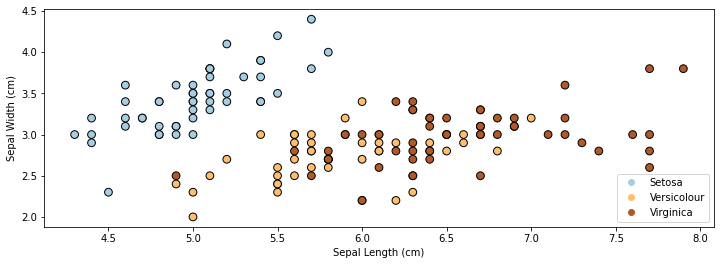

In [10]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# create 2d version of dataset
X = iris_X.to_numpy()[:,:2]
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Plot also the training points
p1 = plt.scatter(X[:, 0], X[:, 1], c=iris_y, edgecolor='k', s=60, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='lower right')

# Example: Iris Flower Classification

Let's see how this approach can be used in practice on the Iris dataset.
* We will learn a good set of parameters for a Gaussian Discriminant model
* We will compare the outputs to the true predictions.

Let's first start by computing the true parameters on our dataset.

In [11]:
# we can implement these formulas over the Iris dataset
d = 2 # number of features in our toy dataset
K = 3 # number of clases
n = X.shape[0] # size of the dataset

# these are the shapes of the parameters
mus = np.zeros([K,d])
Sigmas = np.zeros([K,d,d])
phis = np.zeros([K])

# we now compute the parameters from the solution of the above optimization
for k in range(3):
    X_k = X[iris_y == k]
    mus[k] = np.mean(X_k, axis=0)
    Sigmas[k] = np.cov(X_k.T)
    phis[k] = X_k.shape[0] / float(n)

# print out the means
print(mus)

[[5.006 3.428]
 [5.936 2.77 ]
 [6.588 2.974]]


We can compute predictions using Bayes' rule.

In [12]:
# we can implement this in numpy
def gda_predictions(x, mus, Sigmas, phis):
    """This returns class assignments and p(y|x) under the GDA model.
    
    We compute \arg\max_y p(y|x) as \arg\max_y p(x|y)p(y)
    """
    # adjust shapes
    n, d = x.shape
    x = np.reshape(x, (1, n, d, 1))
    mus = np.reshape(mus, (K, 1, d, 1))
    Sigmas = np.reshape(Sigmas, (K, 1, d, d))    
    
    # compute probabilities
    py = np.tile(phis.reshape((K,1)), (1,n)).reshape([K,n,1,1])
    pxy = (
        np.sqrt(np.abs((2*np.pi)**d*np.linalg.det(Sigmas))).reshape((K,1,1,1)) 
        * -.5*np.exp(
            np.matmul(np.matmul((x-mus).transpose([0,1,3,2]), np.linalg.inv(Sigmas)), x-mus)
        )
    )
    pyx = pxy * py
    return pyx.argmax(axis=0).flatten(), pyx.reshape([K,n])

idx, pyx = gda_predictions(X, mus, Sigmas, phis)
print(idx)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1
 2 2 2 2 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 2 2
 2 1]


We visualize the decision boundaries like we did earlier.

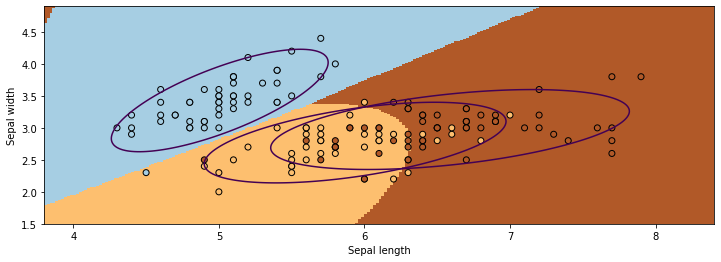

In [13]:
from matplotlib.colors import LogNorm
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z, pyx = gda_predictions(np.c_[xx.ravel(), yy.ravel()], mus, Sigmas, phis)
logpy = np.log(-1./3*pyx)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
contours = np.zeros([K, xx.shape[0], xx.shape[1]])
for k in range(K):
    contours[k] = logpy[k].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
for k in range(K):
    plt.contour(xx, yy, contours[k], levels=np.logspace(0, 1, 1))

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=iris_y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

# Algorithm: Gaussian Discriminant Analysis

* __Type__: Supervised learning (multi-class classification)
* __Model family__: Mixtures of Gaussians.
* __Objective function__: Log-likelihood.
* __Optimizer__: Closed form solution.

# Special Cases of GDA

Many important generative algorithms are special cases of Gaussian Discriminative Analysis
* Linear discriminant analysis (LDA): all the covariance matrices $\Sigma_k$ take the same value.
* Gaussian Naive Bayes: all the covariance matrices $\Sigma_k$ are diagonal.
* Quadratic discriminant analysis (QDA): another term for GDA.

# Generative vs. Discriminative Approaches

Discriminative classifiers Goal: Want to predict class probability given $x$, that is, we want to compute $P_{\boldsymbol\theta}(y|\mathbf x)$. We accomplish this through two steps
* Assume a model form for $P_{\boldsymbol\theta}(y|\mathbf x)$
* Train $\boldsymbol\theta^*$ using maximum likelihood (or Bayesian approach) using training data.

Pros of discriminative models:
* Often more accurate because they make fewer modeling assumptions.

Generative classifier Goal: Want to predict class probability given $x$, that is, we want to compute $P_{\boldsymbol\theta}(y|\mathbf x)$. We accomplish that using Bayesian approach: 
$$
P_{\boldsymbol\theta}(y|\mathbf x) = \frac{P_{\boldsymbol\theta}(\mathbf x | y) P_{\boldsymbol\theta}(y) }{P_{\boldsymbol\theta}(\mathbf x)}
$$
via the following steps

* Postulate a model for class probability: $P_{\boldsymbol\theta}(y)$
* Postulate a model for the conditional probability of feature $x$ within a class: $P_{\boldsymbol\theta}(\mathbf x | y)$
* Train $\boldsymbol\theta^*$ based on the the joint likelihood $P_{\boldsymbol\theta}(\mathbf x,y) = P_{\boldsymbol\theta}(\mathbf x | y) P_{\boldsymbol\theta}( y)$

Pros of generative models:

1. Can do more than just prediction: generation, fill-in missing features, etc.
2. Can include extra prior knowledge; if prior knowledge is correct, model will be more accurate.
3. Often have closed-form solutions, hence are faster to train.